<a href="https://colab.research.google.com/github/szviri/opencv/blob/master/Idomsoft_timeseries_data_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://deeplearningoktatas.hu/downloads/SequentialData/price-history-kraken-XETHZEUR-20170620.csv

--2021-06-02 13:13:27--  http://deeplearningoktatas.hu/downloads/SequentialData/price-history-kraken-XETHZEUR-20170620.csv
Resolving deeplearningoktatas.hu (deeplearningoktatas.hu)... 91.227.138.51
Connecting to deeplearningoktatas.hu (deeplearningoktatas.hu)|91.227.138.51|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.deeplearningoktatas.hu/downloads/SequentialData/price-history-kraken-XETHZEUR-20170620.csv [following]
--2021-06-02 13:13:28--  https://www.deeplearningoktatas.hu/downloads/SequentialData/price-history-kraken-XETHZEUR-20170620.csv
Resolving www.deeplearningoktatas.hu (www.deeplearningoktatas.hu)... 91.227.138.51
Connecting to www.deeplearningoktatas.hu (www.deeplearningoktatas.hu)|91.227.138.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580389 (567K) [text/csv]
Saving to: ‘price-history-kraken-XETHZEUR-20170620.csv’

price-history-krake 100%[===================>] 566.79K   408KB/s    in

In [ ]:
!ls -l

total 572
-rw-r--r-- 1 root root 580389 Nov 28  2019 price-history-kraken-XETHZEUR-20170620.csv
drwxr-xr-x 1 root root   4096 May  6 13:44 sample_data


In [ ]:
!pip install mpl_finance

In [ ]:
import pandas as pd
import numpy as np
import time
import glob
import datetime
from time import gmtime, strftime
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_finance import candlestick_ohlc

In [ ]:
current_date = str(strftime("%Y%m%d%H%M", gmtime()))

In [ ]:
current_date

'202106021318'

In [ ]:
allFiles = glob.glob("price-history-kraken*.csv")
list_=[] #[None]*listahossza

def dateparse(time_in_secs):
  return datetime.datetime.fromtimestamp(float(time_in_secs))

for csvfile in allFiles:
  df = pd.read_csv(csvfile, sep=',', names=['price', 'volume', 'Date Time', 'BuySell', 'MarketLimit'],
                   index_col=False, parse_dates=["Date Time"], date_parser=dateparse)
  df = df.set_index(["Date Time"])
  list_.append(df) 

result = pd.concat(list_) # osszefuzi a df-eket
result = result.sort_index() # idosorba rendezi

In [ ]:
result.head()

,price,volume,BuySell,MarketLimit
Date Time,,,,
2017-06-19 14:26:19.526500,316.38354,0.249235,b,m
2017-06-19 14:26:32.288200,316.49999,0.249235,b,m
2017-06-19 14:26:32.303400,316.50000,5.126265,b,m
2017-06-19 14:26:35.738500,316.38354,0.175200,s,m
2017-06-19 14:26:35.753100,316.24015,20.000000,s,m


In [ ]:
len(result)

13503

In [ ]:
result_violin = result.copy()

In [ ]:
result_violin['Day'] = result_violin.index.day
result_violin['Hour'] = result_violin.index.hour
result_violin['DayHour'] = result_violin.apply(lambda x: str(int(x['Day']))+str(int(x['Hour'])), 1)


In [ ]:
result_violin.head()

,price,volume,BuySell,MarketLimit,Day,Hour,DayHour
Date Time,,,,,,,
2017-06-19 14:26:19.526500,316.38354,0.249235,b,m,19,14,1914
2017-06-19 14:26:32.288200,316.49999,0.249235,b,m,19,14,1914
2017-06-19 14:26:32.303400,316.50000,5.126265,b,m,19,14,1914
2017-06-19 14:26:35.738500,316.38354,0.175200,s,m,19,14,1914
2017-06-19 14:26:35.753100,316.24015,20.000000,s,m,19,14,1914


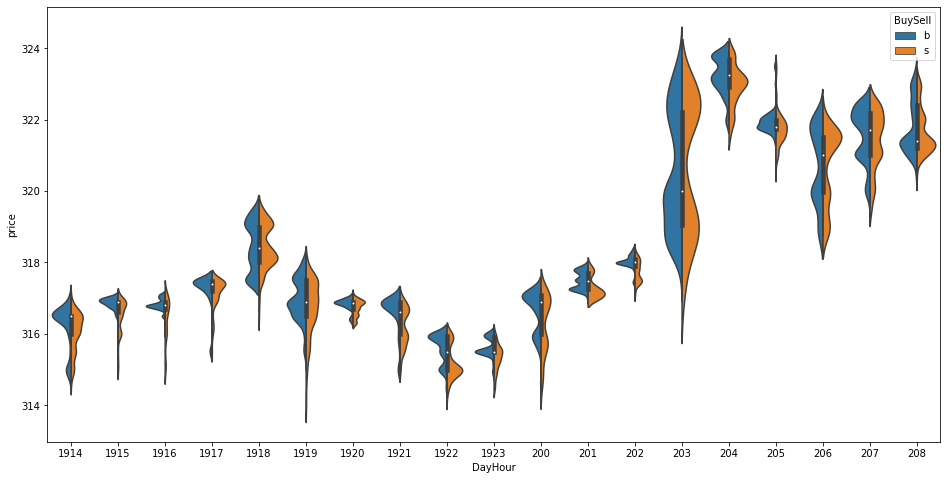

In [ ]:
plt.figure(figsize=(16,8))
sns.violinplot(x="DayHour", y="price", data=result_violin, hue='BuySell', split=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


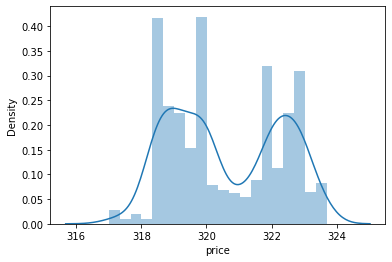

In [ ]:
sns.distplot(result_violin[result_violin['DayHour']=="203"].price, bins=20)

In [ ]:
timeframe="1min"
result_p = result["price"].resample(timeframe).ohlc()

#result_o = result["price"].resample(timeframe).first()
#result_h = result["price"].resample(timeframe).max()
#result_l = result["price"].resample(timeframe).min()
#result_c = result["price"].resample(timeframe).last()



In [ ]:
result_p

,open,high,low,close
Date Time,,,,
2017-06-19 14:26:00,316.38354,316.50000,316.24010,316.49998
2017-06-19 14:27:00,316.38354,316.49987,316.20000,316.20000
2017-06-19 14:28:00,316.49986,316.50000,315.43325,316.20002
2017-06-19 14:29:00,316.20000,316.48000,315.43336,315.50001
2017-06-19 14:30:00,315.50020,316.20000,315.50000,315.50000
...,...,...,...,...
2017-06-20 08:32:00,322.60002,322.91974,322.60002,322.91974
2017-06-20 08:33:00,322.91974,322.92300,322.91974,322.92299
2017-06-20 08:34:00,322.92298,323.32717,322.92298,323.00000


In [ ]:
result_v = result["volume"].resample(timeframe).sum()

In [ ]:
result_v

Date Time
2017-06-19 14:26:00     40.906281
2017-06-19 14:27:00     11.982467
2017-06-19 14:28:00     43.938496
2017-06-19 14:29:00     32.944811
2017-06-19 14:30:00     70.665895
                          ...    
2017-06-20 08:32:00     13.289151
2017-06-20 08:33:00    138.149132
2017-06-20 08:34:00    283.004230
2017-06-20 08:35:00     82.201274
2017-06-20 08:36:00      8.221425
Freq: T, Name: volume, Length: 1091, dtype: float64

In [ ]:
len(result_v)

1091

In [ ]:
result_p.isnull().any(axis=1).sum()

22

In [ ]:
result_p = result_p.ffill()

In [ ]:
result_p

,open,high,low,close
Date Time,,,,
2017-06-19 14:26:00,316.38354,316.50000,316.24010,316.49998
2017-06-19 14:27:00,316.38354,316.49987,316.20000,316.20000
2017-06-19 14:28:00,316.49986,316.50000,315.43325,316.20002
2017-06-19 14:29:00,316.20000,316.48000,315.43336,315.50001
2017-06-19 14:30:00,315.50020,316.20000,315.50000,315.50000
...,...,...,...,...
2017-06-20 08:32:00,322.60002,322.91974,322.60002,322.91974
2017-06-20 08:33:00,322.91974,322.92300,322.91974,322.92299
2017-06-20 08:34:00,322.92298,323.32717,322.92298,323.00000


In [ ]:
result_ohlcv = result_p.join(result_v)

In [ ]:
result_ohlcv.head()

,open,high,low,close,volume
Date Time,,,,,
2017-06-19 14:26:00,316.38354,316.50000,316.24010,316.49998,40.906281
2017-06-19 14:27:00,316.38354,316.49987,316.20000,316.20000,11.982467
2017-06-19 14:28:00,316.49986,316.50000,315.43325,316.20002,43.938496
2017-06-19 14:29:00,316.20000,316.48000,315.43336,315.50001,32.944811
2017-06-19 14:30:00,315.50020,316.20000,315.50000,315.50000,70.665895


No handles with labels found to put in legend.


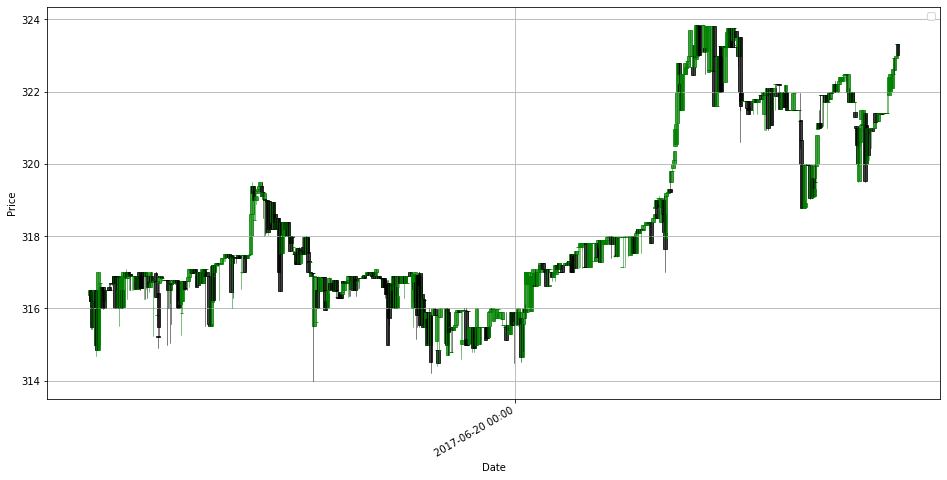

In [ ]:
import matplotlib.dates as mdates
result_ohlc_plot = result_ohlcv[['open','high','low','close']].reset_index()
result_ohlc_plot["Date Time"]=result_ohlc_plot["Date Time"].map(mdates.date2num)
result_ohlc_plot.head()

fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=6, colspan=1)
width = 1./(24*60)*5  # a gyertyák 5 perc szélesek lesznek

candlestick_ohlc(ax1,result_ohlc_plot.values,width=width, colorup='g', colordown='k',alpha=0.75)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
ax1.xaxis.set_major_locator(mdates.HourLocator(byhour=[0,12]))
fig.autofmt_xdate()
ax1.grid(True)

plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
result_ohlcv.to_hdf("resampled.hdf5", key="data")

In [ ]:
np.log(result_ohlcv['open'].values)-np.log(result_ohlcv['open'].shift(1).values)

array([            nan,  0.00000000e+00,  3.67587462e-04, ...,
        1.00334026e-05,  1.25115637e-03, -2.15264092e-05])

In [ ]:
step = 4
window_size = 16
data = result_ohlcv

lr_open = np.log(data['open'].values) - np.log(data['open'].shift(1).values) # aktualis - elozo erteket
lr_low = np.log(data['low'].values) - np.log(data['low'].shift(1).values) # aktualis - elozo erteket
lr_high = np.log(data['high'].values) - np.log(data['high'].shift(1).values) # aktualis - elozo erteket
lr_close = np.log(data['close'].values) - np.log(data['close'].shift(1).values) # aktualis - elozo erteket
target = data['close'].shift(-1) > data['close'] 

data_np = np.column_stack((lr_open, lr_high, lr_low, lr_close, target))

In [ ]:
data_np.shape

(1091, 5)

In [ ]:
X=[]
Y=[]

data_np = data_np[1:]

for i in range(0, data.shape[0]-window_size, step):
  X.append(data_np[i:i+window_size,:-1])
  Y.append(data_np[i+window_size,-1])

X=np.asarray(X)
Y=np.asarray(Y)

        

In [ ]:
X.shape

(269, 16, 4)

In [ ]:
Y.shape

(269,)

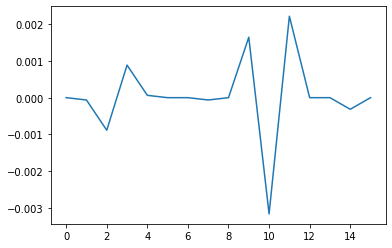

In [ ]:
plt.plot(X[0,:,1])

In [ ]:
Y[0]

0.0

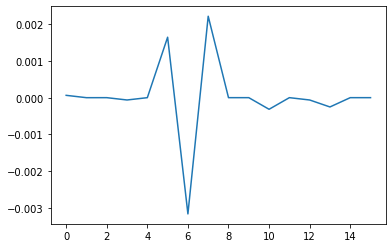

In [ ]:
plt.plot(X[1,:,1])

In [ ]:
Y[1]

0.0